# Exercise 1 - Classification to predict student admission

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

## Exercise steps

### a. Logistic regression classifier with linear decision boundary

#### a) Read the data from file

In a similar way as for the exercise of the previous week, read the training data from file `student-dataset-train.csv`. The first two columns are $x_{1}$ and $x_{2}$. The last column holds the class label $y$. Build the design matrix $X$ as follow:

<center>$X = \left(\begin{array}{ccc} 
        1 &   x_{1,1} & x_{1,2} \\
        1 &   \vdots  & \vdots  \\
        1 &   x_{N,1} & x_{N,2}
           \end{array}\right)$</center>

Check that the shape of $X$ is (100,3) and that the shape of $y$ is (100,).

In [4]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1', 'x2', 'y'])
    X = dataset[["x1", "x2"]].values
    y = dataset["y"].values
    return X, y

#read all datas
Xtrain, ytrain = read_data("student-dataset-train.csv")
Xtest, ytest = read_data("student-dataset-test.csv")

XtrainBias = np.column_stack((np.ones(len(Xtrain)), Xtrain))
XtestBias = np.column_stack((np.ones(len(Xtest)), Xtest))

#check (100,3) and (100,)
print(str(XtrainBias.shape))
print(str(ytrain.shape))



(100, 3)
(100,)


#### b) Implement a z-norm normalization of the training set

You need to store the normalization values $(\mu, \sigma)$ for later as they will be needed to normalize the test set.

In [5]:
def z_norm(X):
    Xnorm = X.copy()
    meanX = np.mean(X[:, 1:], axis=0)
    stdX = np.std(X[:, 1:], axis=0)
    stdX[stdX == 0] = 1#sécurtié disision par 0
    Xnorm[:, 1:] = (X[:, 1:] - meanX) / stdX
    meanX = np.insert(meanX, 0, 0)
    stdX = np.insert(stdX, 0, 1)
    return Xnorm, meanX, stdX

xtrainNorm, xtrainMean, xtrainStd = z_norm(XtrainBias)
xtestNorm, xtestMean, xtestStd = z_norm(XtestBias)
#print(xtestNorm)
#print(xtrainNorm)


#### c) Implement a sigmoid function $g(z) = \frac{1}{1+e^{-z}}$

Use numpy to compute the exp so that your function can take numpy arrays as input. Check your implementation by plotting the sigmoid function.

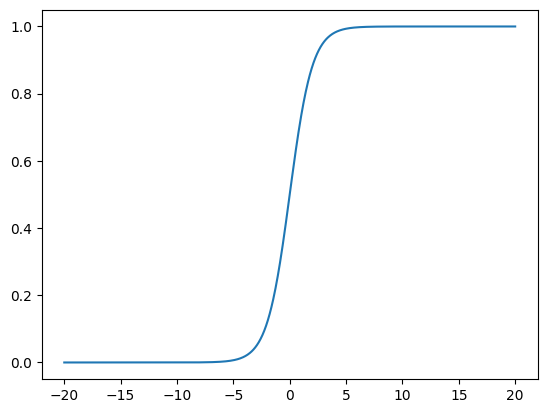

In [6]:
def sig(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-20, 20, 1000) # plot un exemple
plt.plot(z, sig(z))

#### d) Implement the hypothesis function $h_{\theta}(\mathbf{x})$

Hint: implement it so that the computation can take the full array $X$ with $h(\mathbf{x})$ broadcasted to all training samples.

In [7]:
def hyp(x, theta):
    return sig(x.dot(theta))

#### e) Implement the objective function $J(\theta)$

<center>$J(\theta) = \frac{1}{N} \sum_{n=1}^{N} y_{n} \log h_{\theta}(\mathbf{x_{n}}) + (1-y_{n}) \log (1 - h_{\theta} (\mathbf{x_{n}}))$</center>

In [8]:
def obj(X,y,theta):
    N = X.shape[0]
    h = hyp(X,theta)
    return (1/N)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    

#### f) Implement the gradient ascent

In a similar way as in PW02 and PW03, implement the gradient ascent with the update rule:

<center>$\theta_{i} \leftarrow \theta_{i} + \alpha \frac{1}{N} \sum_{n=1}^{N} (y_{n} - h_{\theta}(\mathbf{x}_{n})) x_{n,i}$</center>

In [9]:
def gradientAscent(X, y, learning_rate, num_epoch): # Creer la méthode gradient ascent 
    J = np.zeros(num_epoch)  
    N = X.shape[0]           
    D = X.shape[1]           
    theta = np.zeros(D) 
    print(J,N,D,theta)
    
    for i in range(num_epoch):
        J[i] = obj(X, y, theta) # plot la cost value --> utilise pour l exo d apres
        h = hyp(X, theta) # h theta de x
        loss = y - h # soustraction dans la fonction
        gradient = np.dot(loss, X) / N # 
        theta = theta + learning_rate * gradient
    
    return theta, J

#### g) Test your implementation by running a gradient ascent

Hints: use a small $\alpha$. e.g. $0.001$,  store the evolution of the objective function $J(\theta)$ during the epochs to make a plot, use a large number of epochs, e.g. $2000000$.

[0. 0. 0. ... 0. 0. 0.] 100 3 [0. 0. 0.]
[1.71844403 3.99277595 3.72512522]


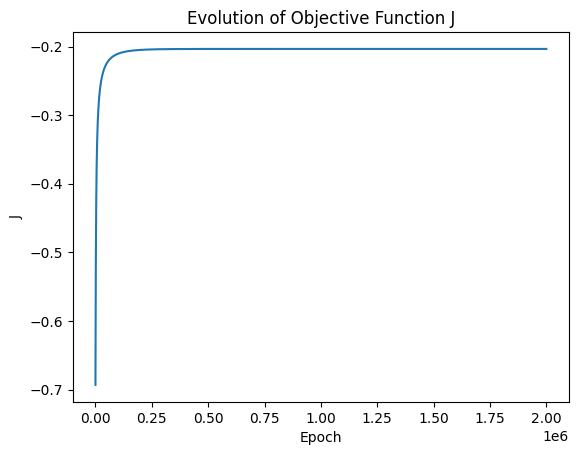

In [10]:
theta, J = gradientAscent(xtrainNorm, ytrain, 0.001, 2000000)

print(theta)
plt.plot(J)
plt.title("Evolution of Objective Function J")
plt.xlabel("Epoch")
plt.ylabel('J')
plt.show()

#### h) Compute the correct classification rate on `student-dataset-test.csv`

Compute the correct classification rate on `student-dataset-test.csv` after convergence as you have an estimator of the posterior probabilities with:

<center>$P(y_{n}=1|\mathbf{x_{n}};\theta) = h_{\theta}(\mathbf{x_{n}})$</center>
<center>$P(y_{n}=0|\mathbf{x_{n}};\theta) = 1 - h_{\theta}(\mathbf{x_{n}})$</center>

This means that you can take the decisions $\hat{y}_{n} = 1$ if $h_{\theta}(\mathbf{x_{n}}) \geq 0.5$ and $\hat{y}_{n} = 0$ if $h_{\theta}(\mathbf{x_{n}}) < 0.5$.

In [11]:
proba = hyp(xtestNorm, theta)
#print(xtestNorm)
pred = (proba >= 0.5).astype(int)
correct_rate = np.mean(pred == ytest) * 100
print(f"the correct prob is: {correct_rate}%")

the correct prob is: 90.0%


#### i) Draw the decision boundary

Draw the decision boundary of your system on top of the scatter plot of the testing data.

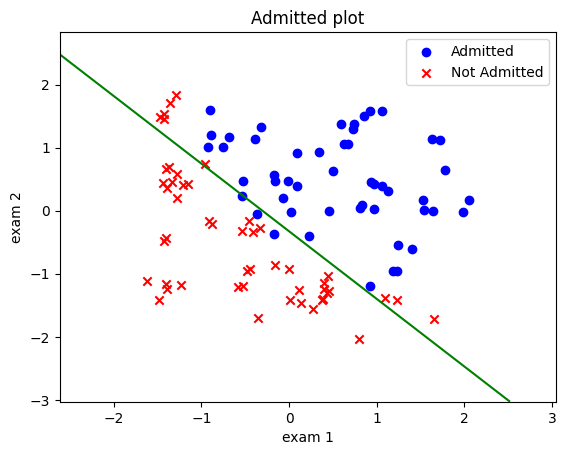

In [18]:
admi = xtestNorm[ytest == 1]
notadmi = xtestNorm[ytest == 0]
# Définir les limites pour chaque feature
x1_range = xtestNorm[:, 1]
x2_range = xtestNorm[:, 2]

x1_min, x1_max = x1_range.min() - 1, x1_range.max() + 1
x2_min, x2_max = x2_range.min() - 1, x2_range.max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

z = theta[0] + theta[1] * xx1 + theta[2] * xx2
prob = sig(z)

plt.contour(xx1, xx2, z, levels=[0.5], colors='green')

plt.scatter(admi[:, 1], admi[:, 2], marker='o', color='blue', label='Admitted')
plt.scatter(notadmi[:, 1], notadmi[:, 2], marker='x', color='red', label='Not Admitted')

# plot
plt.xlabel('exam 1')
plt.ylabel('exam 2')
plt.title('Admitted plot')
plt.legend()
plt.show()


#### j) Compare the performance

Compare the performance of the logistic regression system with the ones of previous's week.

In [11]:
# Your observation here

### b. Optional - Stochastic gradient ascent

Redo the experiments of 2.a with a stochastic gradient ascent.

In [12]:
# Your code here

### c. Logistic regression classifier with non-linear decision boundary

Redo the experiments of 2.a by increasing the complexity of the model in order to have a non-linear decision boundary:

<center>$h_{\theta}(\mathbf{x}) = g(\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + \theta_{3} x_{1}^{2} + \theta_{4} x_{2}^{2} + \theta_{5} x_{1}x_{2} + \ldots)$</center>

In [13]:
# Your code here

### d. Using SciKit Learn

Redo one of the exercise a. or c. using SciKit Learn.

1. Read the documentation of the function `SGDClassifier()` available in the toolkit SciKit Learn. This function implements stochastic gradient descent training for different linear systems such as Logistic Regression. For a logistic regression, the `loss` parameter should be set to `"log"`.
1. Use the `fit()` and `predict()` methods of this classifier on the student data.
1. Compute the performances and compare it to your own implementations.

In [14]:
# Your code here